In [1]:
import numpy as np
import pandas as pd
import os
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")

# BASIC CHECKS

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.shape

(891, 12)

In [8]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data['Age'].fillna(data['Age'].mode(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [11]:
data.drop(columns=['Cabin'], inplace=True)

# EDA

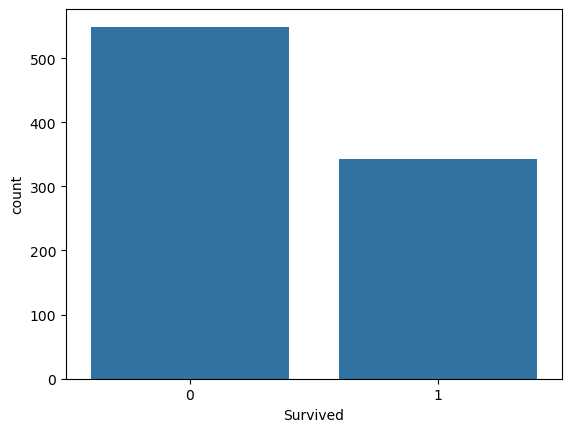

In [12]:
sns.countplot(x=data['Survived'])
plt.show()

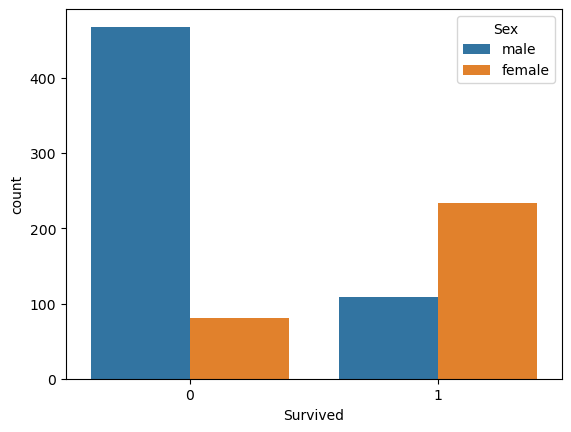

In [13]:
sns.countplot(x=data['Survived'], hue=data['Sex'])
plt.show()

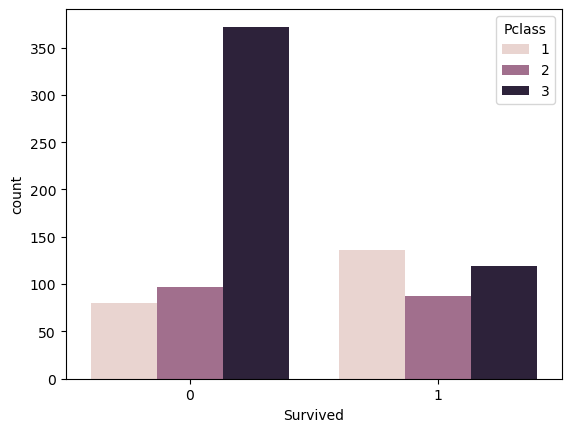

In [14]:
sns.countplot(x=data['Survived'], hue=data['Pclass'])
plt.show()

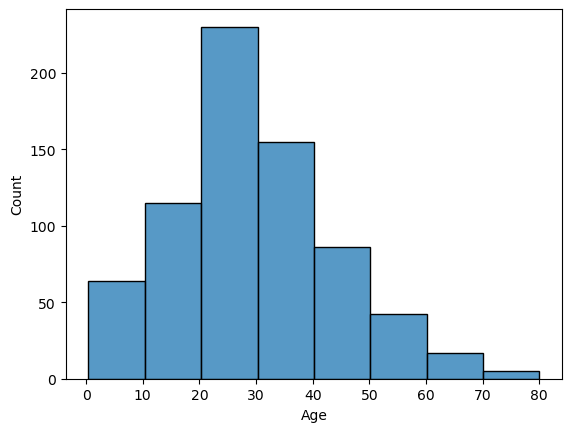

In [15]:
sns.histplot(data['Age'],bins=8)
plt.show()

In [16]:
#From EDA we can clearly see that male has lower survived rate and P1 has higher survived rate.

# feature engineering

In [17]:
data.drop(columns=['Name','Ticket','PassengerId'], inplace=True)

In [18]:
data = pd.get_dummies(data, columns=['Sex','Embarked'], drop_first=True)

In [19]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,NaN,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [28]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

# MODEL EVALUATION

In [44]:
#logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression() 

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_cap = model.predict(x_test)

In [49]:
y_cap.shape

(179,)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_cap)

0.7988826815642458

In [36]:
#decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model= DecisionTreeClassifier()

In [39]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_cap = model.predict(x_test)

In [41]:
y_cap.shape

(179,)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_cap,y_test)

0.7988826815642458

In [52]:
#random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier()

In [55]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_cap = model.predict(x_test)

In [57]:
y_cap.shape

(179,)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_cap,y_test)

0.8156424581005587

In [60]:
#xgboost

In [61]:
from xgboost import XGBClassifier

In [62]:
model = XGBClassifier()

In [63]:
y = data['Survived']
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [64]:
y_cap = model.predict(x_test)

In [65]:
y_cap.shape

(179,)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_cap,y_test)

0.8268156424581006